In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

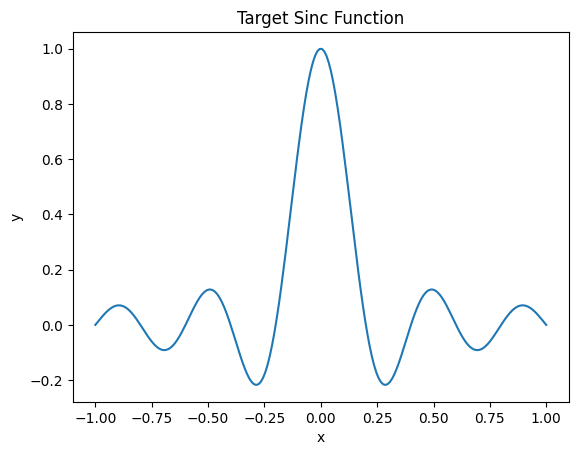

In [23]:
# Generate evenly spaced input data between -1 and 1
input_values = torch.linspace(-1, 1, 200).reshape(-1, 1)

# Target output using sinc function approximation
target_values = (np.sin(5 * np.pi * input_values)) / (5 * np.pi * input_values)

# Plot the target data
plt.plot(input_values.numpy(), target_values.numpy())
plt.ylabel('y')
plt.xlabel('x')
plt.title('Target Sinc Function')
plt.show()

In [24]:
# Define a deep feedforward neural network
class DeepModelA(nn.Module):
    def __init__(self, input_size=1, hidden1=6, hidden2=12, hidden3=12, hidden4=8, output_size=1):
        super(DeepModelA, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, hidden3)
        self.fc4 = nn.Linear(hidden3, hidden4)
        self.output = nn.Linear(hidden4, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.output(x)
        return x

# Create an instance of Model A
model_a = DeepModelA()
model_a

# Define the loss function and optimizer
loss_function = nn.MSELoss()
optimizer_a = torch.optim.Adam(model_a.parameters(), lr=0.001)

# Train Model A
epochs = 2000
model_a_losses = []

for epoch in range(epochs):
    # Forward pass
    predictions_a = model_a(input_values)

    # Calculate loss
    loss_a = loss_function(predictions_a, target_values)

    # Track loss for plotting
    model_a_losses.append(loss_a.item())

    # Zero the gradients before backpropagation
    optimizer_a.zero_grad()

    # Backpropagate the loss and update weights
    loss_a.backward()
    optimizer_a.step()



In [25]:
class DeepModelB(nn.Module):
    def __init__(self, input_size=1, hidden1=8, hidden2=16, hidden3=10, output_size=1):
        super(DeepModelB, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, hidden3)
        self.output = nn.Linear(hidden3, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.output(x)
        return x

# Create an instance of Model B
model_b = DeepModelB()

# Optimizer for Model B
optimizer_b = torch.optim.Adam(model_b.parameters(), lr=0.001)

# Train Model B
model_b_losses = []

for epoch in range(epochs):
    # Forward pass
    predictions_b = model_b(input_values)

    # Calculate loss
    loss_b = loss_function(predictions_b, target_values)

    # Track loss for plotting
    model_b_losses.append(loss_b.item())

    # Zero the gradients before backpropagation
    optimizer_b.zero_grad()

    # Backpropagate the loss and update weights
    loss_b.backward()
    optimizer_b.step()


In [26]:
# Define a simpler neural network with one hidden layer
class ShallowModelC(nn.Module):
    def __init__(self, input_size=1, hidden_size=190, output_size=1):
        super(ShallowModelC, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.output(x)
        return x

# Create an instance of Model C
model_c = ShallowModelC()

# Optimizer for Model C
optimizer_c = torch.optim.Adam(model_c.parameters(), lr=0.001)

# Train Model C
model_c_losses = []

for epoch in range(epochs):
    # Forward pass
    predictions_c = model_c(input_values)

    # Calculate loss
    loss_c = loss_function(predictions_c, target_values)

    # Track loss for plotting
    model_c_losses.append(loss_c.item())

    # Zero the gradients before backpropagation
    optimizer_c.zero_grad()

    # Backpropagate the loss and update weights
    loss_c.backward()
    optimizer_c.step()

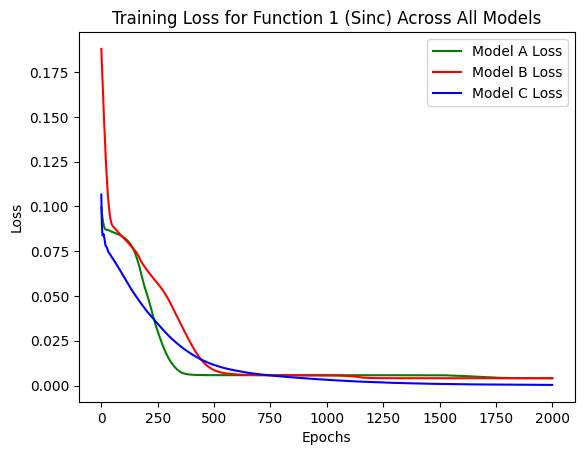

In [27]:
plt.plot(range(epochs), model_a_losses, 'g', label='Model A Loss')
plt.plot(range(epochs), model_b_losses, 'r', label='Model B Loss')
plt.plot(range(epochs), model_c_losses, 'b', label='Model C Loss')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training Loss for Function 1 (Sinc) Across All Models')
plt.show()


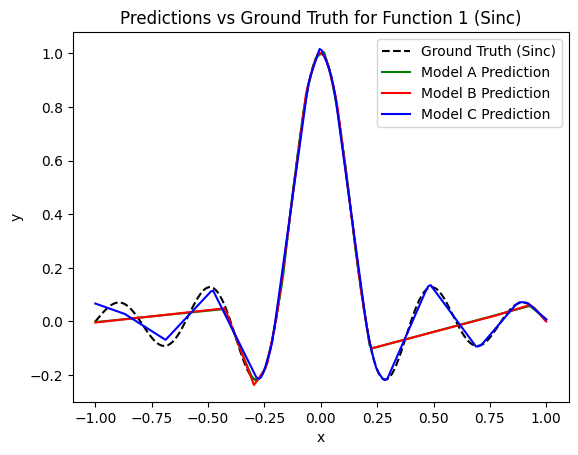

In [28]:
# Plot predictions for all models vs. the ground truth
plt.plot(input_values.numpy(), target_values.numpy(), 'k--', label='Ground Truth (Sinc)')
plt.plot(input_values.numpy(), predictions_a.detach().numpy(), 'g', label='Model A Prediction')
plt.plot(input_values.numpy(), predictions_b.detach().numpy(), 'r', label='Model B Prediction')
plt.plot(input_values.numpy(), predictions_c.detach().numpy(), 'b', label='Model C Prediction')
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.title('Predictions vs Ground Truth for Function 1 (Sinc)')
plt.show()

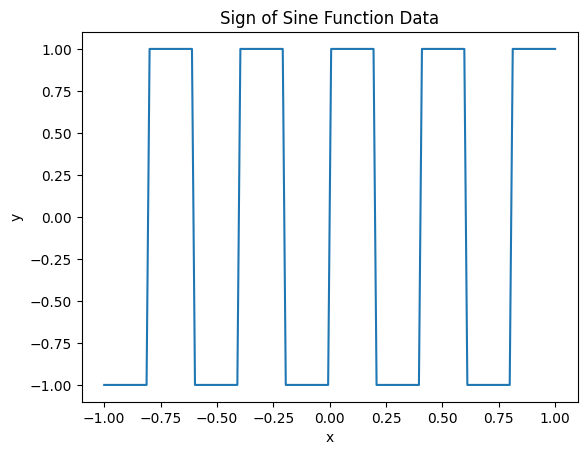

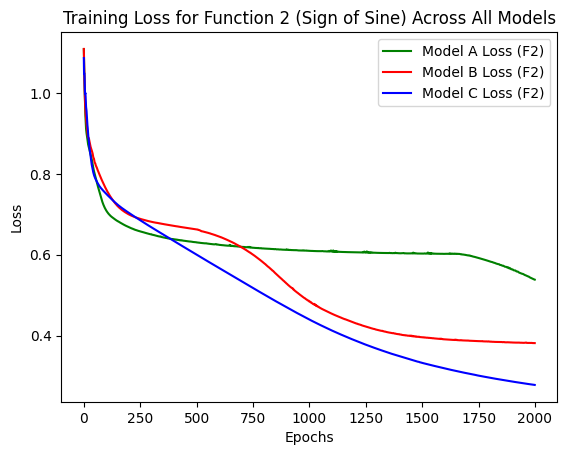

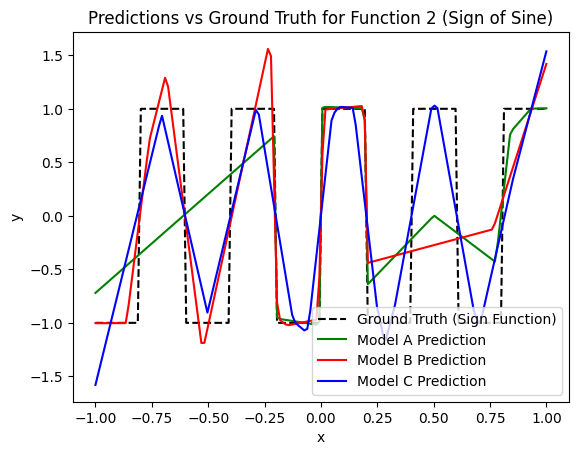

In [29]:
# New input and output for the second function (sign of sine)
input_values_f2 = torch.linspace(-1, 1, 150).reshape(-1, 1)
output_values_f2 = np.sign(np.sin(5 * np.pi * input_values_f2))

# Plot the new function data
plt.plot(input_values_f2.numpy(), output_values_f2.numpy())
plt.ylabel('y')
plt.xlabel('x')
plt.title('Sign of Sine Function Data')
plt.show()

# Train models for Function 2: DeepModelA
model_a_losses_f2 = []
for epoch in range(epochs):
    predictions_a_f2 = model_a(input_values_f2)
    loss_a_f2 = loss_function(predictions_a_f2, output_values_f2)
    model_a_losses_f2.append(loss_a_f2.item())
    optimizer_a.zero_grad()
    loss_a_f2.backward()
    optimizer_a.step()

# Train models for Function 2: DeepModelB
model_b_losses_f2 = []
for epoch in range(epochs):
    predictions_b_f2 = model_b(input_values_f2)
    loss_b_f2 = loss_function(predictions_b_f2, output_values_f2)
    model_b_losses_f2.append(loss_b_f2.item())
    optimizer_b.zero_grad()
    loss_b_f2.backward()
    optimizer_b.step()

# Train models for Function 2: ShallowModelC
model_c_losses_f2 = []
for epoch in range(epochs):
    predictions_c_f2 = model_c(input_values_f2)
    loss_c_f2 = loss_function(predictions_c_f2, output_values_f2)
    model_c_losses_f2.append(loss_c_f2.item())
    optimizer_c.zero_grad()
    loss_c_f2.backward()
    optimizer_c.step()

# Plotting loss for Function 2 across models
plt.plot(range(epochs), model_a_losses_f2, 'g', label='Model A Loss (F2)')
plt.plot(range(epochs), model_b_losses_f2, 'r', label='Model B Loss (F2)')
plt.plot(range(epochs), model_c_losses_f2, 'b', label='Model C Loss (F2)')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training Loss for Function 2 (Sign of Sine) Across All Models')
plt.show()

# Plot predictions for all models on Function 2
plt.plot(input_values_f2.numpy(), output_values_f2, 'k--', label='Ground Truth (Sign Function)')
plt.plot(input_values_f2.numpy(), predictions_a_f2.detach().numpy(), 'g', label='Model A Prediction')
plt.plot(input_values_f2.numpy(), predictions_b_f2.detach().numpy(), 'r', label='Model B Prediction')
plt.plot(input_values_f2.numpy(), predictions_c_f2.detach().numpy(), 'b', label='Model C Prediction')
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.title('Predictions vs Ground Truth for Function 2 (Sign of Sine)')
plt.show()
